In [29]:
import os
from typing import cast

import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [18]:
def load_yfinance(ticker: str, start: str, end: str) -> pd.DataFrame:
    os.makedirs("./data", exist_ok=True)
    path_name = f"./data/{ticker}-{start}to{end}.parquet"

    df: pd.DataFrame
    if os.path.exists(path_name):
        df = pd.read_parquet(path_name)
    else:
        df = cast(pd.DataFrame, yf.download(ticker, start=start, end=end))
        if df.empty:
            raise ValueError(
                f"No data returned for {ticker} between {start} and {end}."
            )
        df.to_parquet(path_name)

    return df

In [19]:
df_AAPL = load_yfinance(ticker="AAPL", start="2024-01-01", end="2025-01-01")

In [20]:
import numpy as np
import scipy.stats as stats

In [40]:
def compute_statistics_for_log_returns(df: pd.DataFrame) -> dict:
    log_returns = np.log(df["Close"] / df["Close"].shift(1))
    df_log_returns = pd.DataFrame(log_returns)
    df_log_returns.dropna(inplace=True)

    mean = np.mean(df_log_returns)
    std = np.std(df_log_returns)
    skew = stats.skew(df_log_returns)
    fisher_kurtosis = stats.kurtosis(df_log_returns, fisher=True)

    return {
        "Log Returns": df_log_returns,
        "Mean": mean,
        "Standard Deviation": std,
        "Skew": skew,
        "Fisher Kurtosis": fisher_kurtosis,
    }

In [41]:
AAPL_statistics = compute_statistics_for_log_returns(df_AAPL)

/Users/pranavbattini/Library/Caches/pypoetry/virtualenvs/quant-finance-progs-AP59VnVU-py3.13/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [42]:
import seaborn

<Axes: ylabel='Count'>

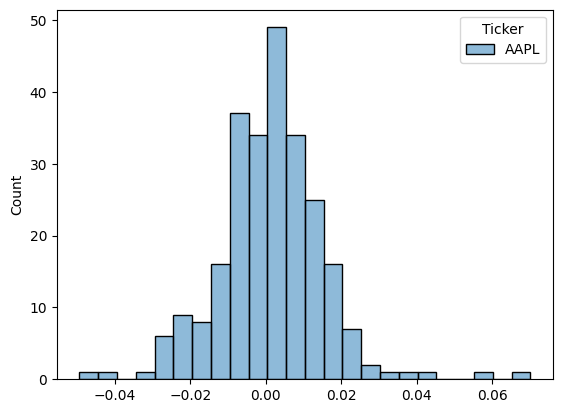

In [48]:
# create histogram
seaborn.histplot(AAPL_statistics["Log Returns"])

<function matplotlib.pyplot.show(close=None, block=None)>

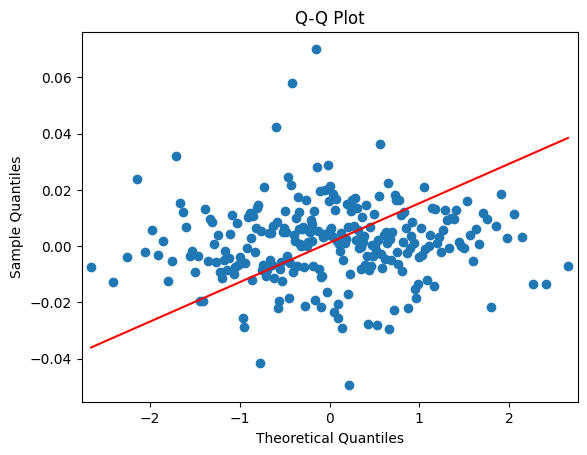

In [51]:
# create qq plot
import statsmodels.api as sm

sm.qqplot(AAPL_statistics["Log Returns"], line="s")
plt.title("Q-Q Plot")
plt.show

In [59]:
print(
    "Statistics for Log Returns —",
    f"Mean: {AAPL_statistics['Mean']},",
    f"Standard Deviation: {AAPL_statistics['Standard Deviation']},",
    f"Skew: {AAPL_statistics['Skew']},",
    f"Fisher Kurtosis: {AAPL_statistics['Fisher Kurtosis']}",
)

Statistics for Log Returns — Mean: 0.0012120214312405682, Standard Deviation: Ticker
AAPL    0.014035
dtype: float64, Skew: [0.39031766], Fisher Kurtosis: [3.34835316]
